In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('stock_data.csv')

In [3]:
df.head(50)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,-1
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1
8,GOOG - ower trend line channel test & volume s...,1
9,AAP will watch tomorrow for ONG entry.,1


In [4]:
df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [5]:
len(df)

5791

In [6]:
import re

In [7]:
data = df['Text']

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\Foundation
[nltk_data]     AI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Foundation
[nltk_data]     AI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Foundation
[nltk_data]     AI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
lemma = WordNetLemmatizer()

In [10]:
cleaned_text = []

In [11]:
for i in range(len(data)):
    
    text = re.sub(pattern='[^a-zA-Z]', repl=' ', string=data[i])
    
    text = text.split()
    
    lemma_tokens = [lemma.lemmatize(w) for w in text if w not in stopwords.words('english')]
    
    cln_text = ' '.join(lemma_tokens)
    
    cleaned_text.append(cln_text.lower())
    
    print(cleaned_text)
    
    
    
    
    
    

['kickers watchlist xide tit soq pnk cpw bpz aj trade method method see prev post']
['kickers watchlist xide tit soq pnk cpw bpz aj trade method method see prev post', 'user aap movie return fea geed indicator trade year awesome']
['kickers watchlist xide tit soq pnk cpw bpz aj trade method method see prev post', 'user aap movie return fea geed indicator trade year awesome', 'user i afraid short amzn looking like near monopoly ebooks infrastructure service']
['kickers watchlist xide tit soq pnk cpw bpz aj trade method method see prev post', 'user aap movie return fea geed indicator trade year awesome', 'user i afraid short amzn looking like near monopoly ebooks infrastructure service', 'mnta over']
['kickers watchlist xide tit soq pnk cpw bpz aj trade method method see prev post', 'user aap movie return fea geed indicator trade year awesome', 'user i afraid short amzn looking like near monopoly ebooks infrastructure service', 'mnta over', 'oi over']
['kickers watchlist xide tit soq pnk

['kickers watchlist xide tit soq pnk cpw bpz aj trade method method see prev post', 'user aap movie return fea geed indicator trade year awesome', 'user i afraid short amzn looking like near monopoly ebooks infrastructure service', 'mnta over', 'oi over', 'pgnx over', 'aap user current downtrend break otherwise short term correction med term downtrend', 'monday relative weakness nyx win tie tap ice int bmc aon c chk biib', 'goog ower trend line channel test volume support', 'aap watch tomorrow ong entry', 'assuming fcx open tomorrow trigger buy still much like setup', 'it really worry everyone expects market rally usually exact opposite happens every time shall see soon bac spx jpm', 'aap gamco arry haverty apple is extremely cheap great video', 'user maykiljil posted i agree msft going higher possibly north', 'momentum coming back etfc broke ma resistance solid volume friday ong set', 'ha hitting mean resume targeting level', 'user gameplan shot today i liked trend break may c h break

['kickers watchlist xide tit soq pnk cpw bpz aj trade method method see prev post', 'user aap movie return fea geed indicator trade year awesome', 'user i afraid short amzn looking like near monopoly ebooks infrastructure service', 'mnta over', 'oi over', 'pgnx over', 'aap user current downtrend break otherwise short term correction med term downtrend', 'monday relative weakness nyx win tie tap ice int bmc aon c chk biib', 'goog ower trend line channel test volume support', 'aap watch tomorrow ong entry', 'assuming fcx open tomorrow trigger buy still much like setup', 'it really worry everyone expects market rally usually exact opposite happens every time shall see soon bac spx jpm', 'aap gamco arry haverty apple is extremely cheap great video', 'user maykiljil posted i agree msft going higher possibly north', 'momentum coming back etfc broke ma resistance solid volume friday ong set', 'ha hitting mean resume targeting level', 'user gameplan shot today i liked trend break may c h break

['kickers watchlist xide tit soq pnk cpw bpz aj trade method method see prev post', 'user aap movie return fea geed indicator trade year awesome', 'user i afraid short amzn looking like near monopoly ebooks infrastructure service', 'mnta over', 'oi over', 'pgnx over', 'aap user current downtrend break otherwise short term correction med term downtrend', 'monday relative weakness nyx win tie tap ice int bmc aon c chk biib', 'goog ower trend line channel test volume support', 'aap watch tomorrow ong entry', 'assuming fcx open tomorrow trigger buy still much like setup', 'it really worry everyone expects market rally usually exact opposite happens every time shall see soon bac spx jpm', 'aap gamco arry haverty apple is extremely cheap great video', 'user maykiljil posted i agree msft going higher possibly north', 'momentum coming back etfc broke ma resistance solid volume friday ong set', 'ha hitting mean resume targeting level', 'user gameplan shot today i liked trend break may c h break

['kickers watchlist xide tit soq pnk cpw bpz aj trade method method see prev post', 'user aap movie return fea geed indicator trade year awesome', 'user i afraid short amzn looking like near monopoly ebooks infrastructure service', 'mnta over', 'oi over', 'pgnx over', 'aap user current downtrend break otherwise short term correction med term downtrend', 'monday relative weakness nyx win tie tap ice int bmc aon c chk biib', 'goog ower trend line channel test volume support', 'aap watch tomorrow ong entry', 'assuming fcx open tomorrow trigger buy still much like setup', 'it really worry everyone expects market rally usually exact opposite happens every time shall see soon bac spx jpm', 'aap gamco arry haverty apple is extremely cheap great video', 'user maykiljil posted i agree msft going higher possibly north', 'momentum coming back etfc broke ma resistance solid volume friday ong set', 'ha hitting mean resume targeting level', 'user gameplan shot today i liked trend break may c h break

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
from wordcloud import WordCloud

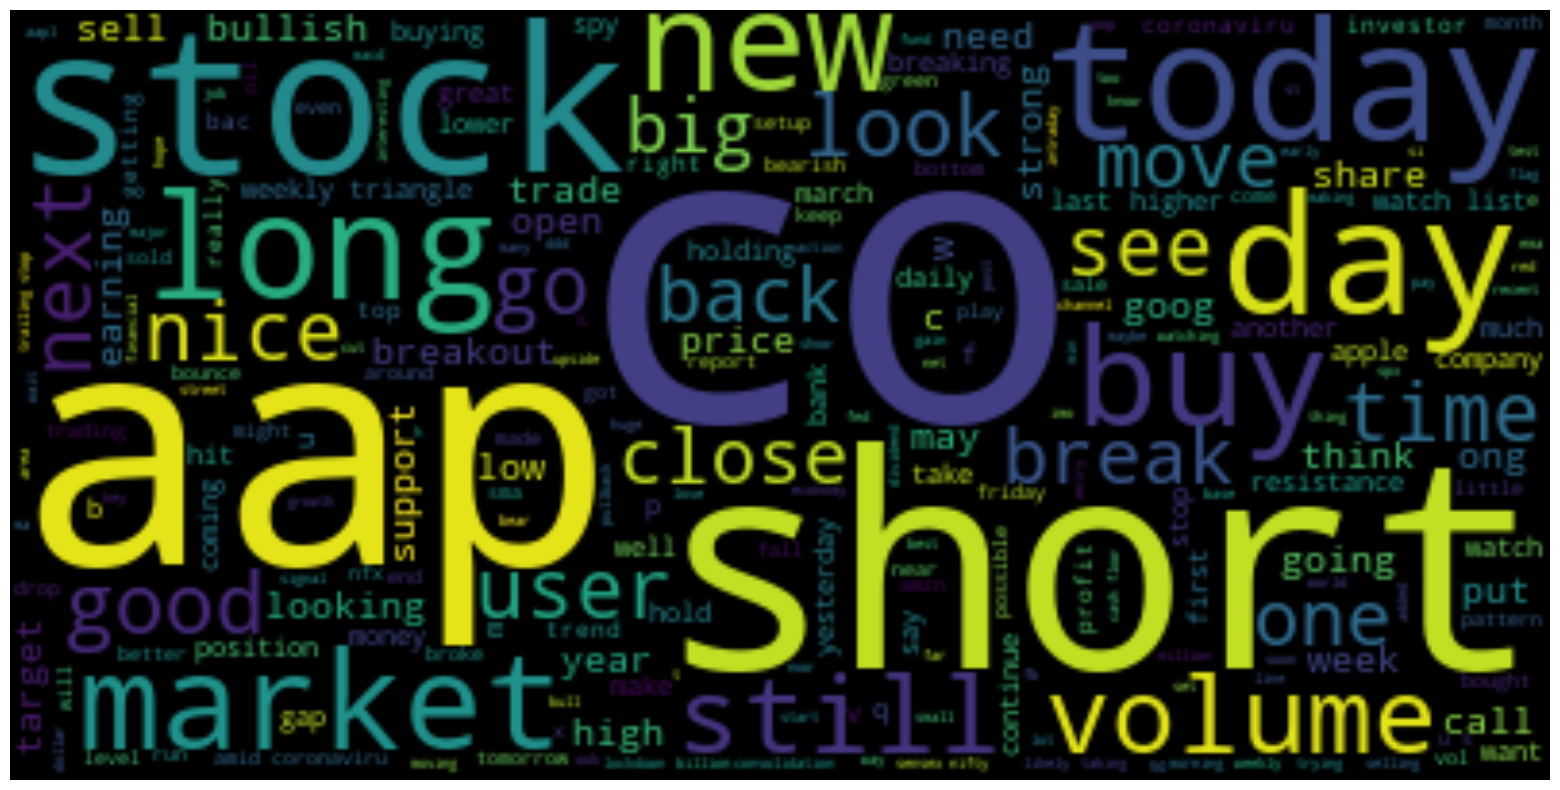

In [13]:
wc = WordCloud(background_color='black', max_words=399).generate(''.join(cleaned_text))
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [15]:
tfidf = TfidfVectorizer()

In [16]:
tfidf.fit(cleaned_text)

TfidfVectorizer()

In [17]:
features = tfidf.transform(cleaned_text)

In [18]:
features

<5791x8808 sparse matrix of type '<class 'numpy.float64'>'
	with 52671 stored elements in Compressed Sparse Row format>

In [19]:
target = df['Sentiment']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=44)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier()

In [24]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
pred = rfc.predict(X_test)

In [26]:
pred

array([ 1, -1, -1, ..., -1,  1,  1], dtype=int64)

In [27]:
q = ["Monday's relative weakness. NYX WIN TIE TAP ICE INT BMC AON C CHK BIIB"]

In [28]:
q = tfidf.transform(q)

In [29]:
q

<1x8808 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [30]:
p = rfc.predict(q)

In [38]:
p

array([-1], dtype=int64)

In [39]:
q1 = ['AAP will watch tomorrow for ONG entry.']

In [40]:
q1 = tfidf.transform(q1)

In [41]:
q1

<1x8808 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [42]:
p1 = rfc.predict(q1)

In [43]:
p1

array([1], dtype=int64)

In [44]:
q2 = 'ovti ttm ending Oct 2012 Negative 151 million operational cash flow.. 273% decline vs yoy ttm ending oct 2011'

In [45]:
q2 = tfidf.transform([q2])

In [46]:
p2 = rfc.predict(q2)

In [47]:
p2

array([-1], dtype=int64)